<a href="https://colab.research.google.com/github/StevenKim1105/StevenKim1105/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mhpi/hydroDL.git

Cloning into 'hydroDL'...
remote: Enumerating objects: 1046, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 1046 (delta 46), reused 19 (delta 10), pack-reused 960
Receiving objects: 100% (1046/1046), 60.67 MiB | 29.32 MiB/s, done.
Resolving deltas: 100% (429/429), done.


In [2]:
import os
os.chdir("/content")
os.getcwd()
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZeX-M2fA-HKNg1nWwDDsI66O6seUwpz4' -O 'CAMELS.zip'
!unzip 'CAMELS.zip' -d '/content/hydroDL/example/linear_regression/'

--2022-12-19 01:59:48--  https://drive.google.com/uc?export=download&id=1ZeX-M2fA-HKNg1nWwDDsI66O6seUwpz4
Resolving drive.google.com (drive.google.com)... 74.125.195.139, 74.125.195.138, 74.125.195.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b9eoemsvtuuigij20gd20kj549r42jen/1671415125000/07681100160477168945/*/1ZeX-M2fA-HKNg1nWwDDsI66O6seUwpz4?e=download&uuid=66da968c-e518-4b05-89c8-d75462a95e95 [following]
--2022-12-19 01:59:48--  https://doc-0s-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b9eoemsvtuuigij20gd20kj549r42jen/1671415125000/07681100160477168945/*/1ZeX-M2fA-HKNg1nWwDDsI66O6seUwpz4?e=download&uuid=66da968c-e518-4b05-89c8-d75462a95e95
Resolving doc-0s-38-docs.googleusercontent.com (doc-0s-38-docs.googleusercontent.com)... 108.177.98.132, 2607:

In [3]:
import torch
from torch.nn import Parameter
import matplotlib.pyplot as plt
import math

In [4]:
class one_layer(torch.nn.Module):
    def __init__(self, inputSize: int, outputSize: int, act=None, dr=0) -> None:
        super(one_layer, self).__init__()
        self.outputSize = outputSize    # hidden size
        self.w = Parameter(torch.randn(inputSize, outputSize))
        self.b = Parameter(torch.randn(outputSize))
        self.act = act
        self.dr = dr
        self.reset_parameters() # initialize model weights. This could be done differently.

    def forward(self, input):
        """return the index of the cluster closest to the input"""
        Y = torch.matmul(input,self.w)+self.b # + is a smart plus
        #Y = self.linear(input)
        if self.act is not None:
            Y = self.act(Y)
        return torch.dropout(Y,p=self.dr,train=self.training)

    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.w.size(0))
        for para in self.parameters():
            para.data.uniform_(-std, std)

In [5]:
class two_layer(torch.nn.Module):
    def __init__(self, inputSize: int, hiddenSize: int, outputSize: int, act=None, dr=0) -> None:
        super(one_layer, self).__init__()
        self.outputSize = outputSize    # hidden size
        self.w1 = Parameter(torch.randn(inputSize, hiddenSize))
        self.b1 = Parameter(torch.randn(hiddenSize))
        self.w2 = Parameter(torch.randn(hiddenSize, outputSize))
        self.b2 = Parameter(torch.randn(outputSize))
        self.act = act
        self.dr = dr
        self.reset_parameters() # initialize model weights. This could be done differently.

    def forward(self, input):
        """return the index of the cluster closest to the input"""
        Y = torch.matmul(input,self.w1)+self.b1 # + is a smart plus
        Y2 = torch.matmul(Y,self.w2)+self.b2 # + is a smart plus
        #Y = self.linear(input)
        if self.act is not None:
            Y2 = self.act(Y2)
        return torch.dropout(Y2,p=self.dr,train=self.training)

    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.w.size(0))
        for para in self.parameters():
            para.data.uniform_(-std, std)


In [6]:
    # read in data
    import numpy as np
    import os
    import pandas as pd
    # download the csv data files from here (OneDrive link shortened) https://bit.ly/3vTnYTT
    # save this .py file to the same directory and browse to it.
    os.chdir(r'/content/hydroDL/example/linear_regression') # edit this for your folder
    runoff_pd = pd.read_csv('CAMELS/runoff_mm.csv') # working directory must be above CAMELS. If not, use os.chdir to change.
    precip_pd = pd.read_csv('CAMELS/precipitation_mm.csv')
    # some data wrangling from source data to easy-to-use format
    # get [years, basin]
    # pd is a pandas object with which you can run a lot of data operations https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
    runoff_mean = runoff_pd.mean(0).to_numpy()[1:]
    #[1:] is to remove the basin number # get basin-averaged runoff by averaging along the 0-th dimension (years)
    runoff_mean = np.expand_dims(runoff_mean,1) # see the effect of this statement on shape
    precip_mean = precip_pd.mean(0).to_numpy()[1:] # turn into a numpy ndarray
    precip_mean = np.expand_dims(precip_mean,1) # get basin-averaged runoff

In [7]:
print(runoff_pd.shape)
print(runoff_mean.shape)

(30, 672)
(671, 1)


Text(0, 0.5, 'long-term-average runoff (mm/year)')

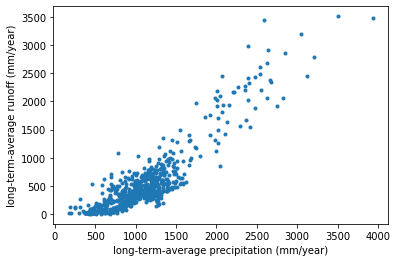

In [8]:
    ax,fig=plt.subplots()
    plt.plot(precip_mean,runoff_mean,'.')
    plt.xlabel('long-term-average precipitation (mm/year)')
    plt.ylabel('long-term-average runoff (mm/year)')
    #plt.show()


In [9]:
    # scale data and get Tensor for PyTorch
    import torch
    torch_option = 0
    precip1 = (precip_mean - precip_mean.mean())/precip_mean.std()
    runoff1 = (runoff_mean - runoff_mean.mean())/runoff_mean.std()
    xT = torch.Tensor(precip1) # scaled
    y = torch.Tensor(runoff1) # scaled
    learning_rate = 0.005; niter=800



In [12]:
print(xT.shape)
type(xT)
print(xT)

torch.Size([671, 1])
tensor([[-1.8444e-01],
        [ 1.2700e-01],
        [ 7.1849e-02],
        [ 1.5939e-01],
        [ 3.0607e-01],
        [ 2.9152e-01],
        [ 7.0581e-01],
        [ 1.3076e-01],
        [ 1.7519e-01],
        [ 1.9042e-01],
        [ 5.9602e-02],
        [ 2.8038e-01],
        [ 2.0235e-01],
        [ 1.6313e-01],
        [ 9.3746e-02],
        [ 7.1504e-01],
        [-1.9416e-02],
        [-2.6270e-02],
        [ 1.9023e-01],
        [ 1.7602e-01],
        [ 1.0663e-01],
        [ 4.0485e-01],
        [ 4.6576e-01],
        [ 5.1457e-01],
        [ 4.8146e-01],
        [ 2.0454e-01],
        [ 1.6668e-01],
        [ 2.3219e-01],
        [-1.7506e-01],
        [-1.2258e-01],
        [ 5.4569e-01],
        [ 1.1275e-02],
        [ 1.7922e-02],
        [ 8.1117e-02],
        [ 1.6596e-02],
        [ 9.3138e-03],
        [ 6.4898e-01],
        [ 4.9933e-01],
        [ 2.1969e-01],
        [ 1.3863e-01],
        [ 3.0128e-01],
        [ 2.4858e-01],
        [ 1.2

In [13]:
        # a. manual gradient calculation + explicit update
        d = 1 # only one regressor.
        w = torch.randn(1,d,requires_grad=True)
        b = torch.randn(1,requires_grad=True)

        for t in range(niter):
            y_pred = torch.matmul(xT,w)+b # first dimension in xT is minibatch
            # the statement above can be generalized to y = model(x)
            err = (y_pred - y)
            loss = err.pow(2.0).mean() # mean squared error
            print(f"iteration {t}, loss is: {loss}, w is: {float(w)}, b is {float(b)}")
            prod = err * xT
            w_grad = 2.0*prod.mean()
            b_grad = 2.0*err.mean()
            with torch.no_grad():
                w = w - learning_rate * w_grad # you can also use prod.mean()
                b = b - learning_rate * b_grad # you can also use err.mean()

iteration 0, loss is: 3.4788260459899902, w is: -0.3764531910419464, b is -1.2908025979995728
iteration 1, loss is: 3.4136946201324463, w is: -0.3637773394584656, b is -1.2778946161270142
iteration 2, loss is: 3.3498589992523193, w is: -0.351228266954422, b is -1.2651156187057495
iteration 3, loss is: 3.2872941493988037, w is: -0.338804692029953, b is -1.2524644136428833
iteration 4, loss is: 3.2259740829467773, w is: -0.3265053331851959, b is -1.23993980884552
iteration 5, loss is: 3.1658740043640137, w is: -0.31432896852493286, b is -1.227540373802185
iteration 6, loss is: 3.1069703102111816, w is: -0.3022743761539459, b is -1.215264916419983
iteration 7, loss is: 3.049238443374634, w is: -0.2903403341770172, b is -1.203112244606018
iteration 8, loss is: 2.9926562309265137, w is: -0.27852562069892883, b is -1.191081166267395
iteration 9, loss is: 2.937199592590332, w is: -0.26682907342910767, b is -1.1791703701019287
iteration 10, loss is: 2.8828463554382324, w is: -0.255249470472335

In [15]:
        # b. explicit modeling with automatic differentiation + explicit update
        d = 1 # only one regressor.
        w = torch.randn(1,d,requires_grad=True)
        b = torch.randn(1,requires_grad=True)
        
        for t in range(niter):
            print(t)
            y_pred = torch.matmul(xT,w)+b # first dimension in xT is minibatch
            # the statement above can be generalized to y = model(x)
            err = (y_pred - y)
            loss = err.pow(2.0).mean() # mean squared error
            loss.backward() # run backpropagation
            # we can now verify that the gradients are in agreement with what we can calculate by hand
            prod = err * xT
            print(w.grad - 2.0*prod.mean()) # verified to be 0
            print(b.grad - 2.0*err.mean())  # verified to be 0
            print(f"iteration {t}, loss is: {loss}, w is: {float(w)}, b is {float(b)}")
            with torch.no_grad():
              
              w -= learning_rate * w.grad # you can also use prod.mean() 
              # not the same as w = w - learning_rate * w.grad. this won't work here
              b -= learning_rate * b.grad # you can also use err.mean()
      
              w.grad.zero_()
              b.grad.zero_()

0
tensor([[1.4305e-06]], grad_fn=<SubBackward0>)
tensor([0.], grad_fn=<SubBackward0>)
iteration 0, loss is: 5.6757965087890625, w is: -1.3313122987747192, b is 0.728462815284729
1
tensor([[4.7684e-07]], grad_fn=<SubBackward0>)
tensor([0.], grad_fn=<SubBackward0>)
iteration 1, loss is: 5.566944599151611, w is: -1.309087872505188, b is 0.7211781740188599
2
tensor([[1.4305e-06]], grad_fn=<SubBackward0>)
tensor([1.1921e-07], grad_fn=<SubBackward0>)
iteration 2, loss is: 5.460259914398193, w is: -1.2870856523513794, b is 0.7139663696289062
3
tensor([[-9.5367e-07]], grad_fn=<SubBackward0>)
tensor([0.], grad_fn=<SubBackward0>)
iteration 3, loss is: 5.3556976318359375, w is: -1.2653034925460815, b is 0.7068266868591309
4
tensor([[9.5367e-07]], grad_fn=<SubBackward0>)
tensor([1.1921e-07], grad_fn=<SubBackward0>)
iteration 4, loss is: 5.2532172203063965, w is: -1.243739128112793, b is 0.6997584104537964
5
tensor([[1.4305e-06]], grad_fn=<SubBackward0>)
tensor([0.], grad_fn=<SubBackward0>)
iterati

In [16]:
        # c. 
        d = 1 # only one regressor.
        w = torch.randn(1,d,requires_grad=True)
        b = torch.randn(1,requires_grad=True)
        optim = torch.optim.SGD([w,b],lr=3e-3)

        for t in range(niter):
            y_pred = torch.matmul(xT,w)+b # first dimension in xT is minibatch
            # the statement above can be generalized to y = model(x)
            err = (y_pred - y)
            loss = err.pow(2.0).mean() # mean squared error
            loss.backward() # run backpropagation

            optim.step() # update the parameters
            optim.zero_grad()
            print(f"iteration {t}, loss is: {loss}, w is: {float(w)}, b is {float(b)}")

iteration 0, loss is: 0.240524023771286, w is: 0.7176312208175659, b is -0.06419597566127777
iteration 1, loss is: 0.2401096373796463, w is: 0.7186722159385681, b is -0.0638108029961586
iteration 2, loss is: 0.23970019817352295, w is: 0.7197069525718689, b is -0.06342794001102448
iteration 3, loss is: 0.23929563164710999, w is: 0.720735490322113, b is -0.0630473718047142
iteration 4, loss is: 0.2388959676027298, w is: 0.7217578887939453, b is -0.06266909092664719
iteration 5, loss is: 0.23850099742412567, w is: 0.7227741479873657, b is -0.062293075025081635
iteration 6, loss is: 0.23811081051826477, w is: 0.7237842679023743, b is -0.06191931664943695
iteration 7, loss is: 0.23772528767585754, w is: 0.7247883677482605, b is -0.06154780089855194
iteration 8, loss is: 0.23734432458877563, w is: 0.7257864475250244, b is -0.06117851287126541
iteration 9, loss is: 0.23696796596050262, w is: 0.726778507232666, b is -0.06081144139170647
iteration 10, loss is: 0.23659609258174896, w is: 0.72776

iteration 0, loss is: 1.6804213523864746, w is: -0.2700542211532593, b is 0.32945963740348816
iteration 1, loss is: 1.6627799272537231, w is: -0.26308712363243103, b is 0.3274828791618347
iteration 2, loss is: 1.6453497409820557, w is: -0.25616180896759033, b is 0.3255179822444916
iteration 3, loss is: 1.628127932548523, w is: -0.24927805364131927, b is 0.32356488704681396
iteration 4, loss is: 1.6111122369766235, w is: -0.24243560433387756, b is 0.3216235041618347
iteration 5, loss is: 1.5943001508712769, w is: -0.2356342077255249, b is 0.31969377398490906
iteration 6, loss is: 1.577689290046692, w is: -0.2288736253976822, b is 0.3177756071090698
iteration 7, loss is: 1.561276912689209, w is: -0.22215360403060913, b is 0.31586894392967224
iteration 8, loss is: 1.5450612306594849, w is: -0.21547390520572662, b is 0.31397372484207153
iteration 9, loss is: 1.5290392637252808, w is: -0.20883427560329437, b is 0.3120898902416229
iteration 10, loss is: 1.5132089853286743, w is: -0.202234491

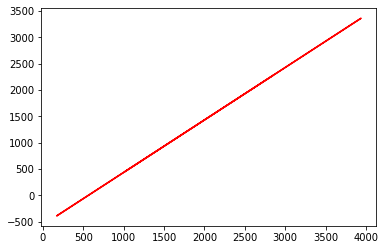

In [17]:
        # d. pytorch modules; one-layer model
        d = 1 # only one regressor.
        model = one_layer(d,1) # input and output dimensions
        optim = torch.optim.SGD(model.parameters(),lr=3e-3)

        for t in range(niter):
            y_pred = model(xT) # it can be any model!
            loss = torch.nn.functional.mse_loss(y_pred, y)
            loss.backward() # run backpropagation

            optim.step()
            optim.zero_grad()
            print(f"iteration {t}, loss is: {loss}, w is: {float(model.w)}, b is {float(model.b)}")

            #pred = model(xT)

        pred = model(xT)
        pred_runoff = (pred * runoff_mean.std()+ runoff_mean.mean()).detach().numpy() # detach() so it can be plotted

        plt.plot(precip_mean, pred_runoff,  '-r')

        ax.legend(['observations','model'])
        plt.show()


#Add more predictors into the equation! Can you modify my code, update options a (by hand gradient calculation) and d (nn.module), to accept more predictors?
#Add lasso regularization! 𝐲=𝐱^𝐓 𝐰^𝐓+𝛼∑abs(w)
#Split the dataset into train and test, evaluate metrics on the test dataset!
#See how does the parameter 𝛼 influence the test results?
#Hints:
#fields = ['pet_mean', 'p_seasonality', 'frac_snow', 'aridity', 'elev_mean', 'slope_mean', 'area_gages2', 'frac_forest']
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score 
# segway to the LSTM notebook: https://bit.ly/3Fvnwyp

In [ ]:
model.w

Parameter containing:
tensor([[0.8852]], requires_grad=True)